In [36]:
import pandas as pd
from preprocessing import get_models_and_soups_df
import matplotlib.pyplot as plt
plt.style.use("style.mplstyle")

In [37]:
soups, models = get_models_and_soups_df("../analysis/combined_analysis.parquet")

In [38]:
soups['difference'] = soups['permutated_gain'] - soups['soup_gain']

In [39]:
soups['difference'].median(), soups['difference'].mean()

(np.float64(0.002780359840393154), np.float64(-10725013.960848894))

In [40]:
len(soups[soups['clean_loss_permuted'] > 5]) / len(soups)

0.07356235997012696

In [41]:
# Clean
soups = soups[soups['clean_loss_permuted'] < 5]

<Axes: >

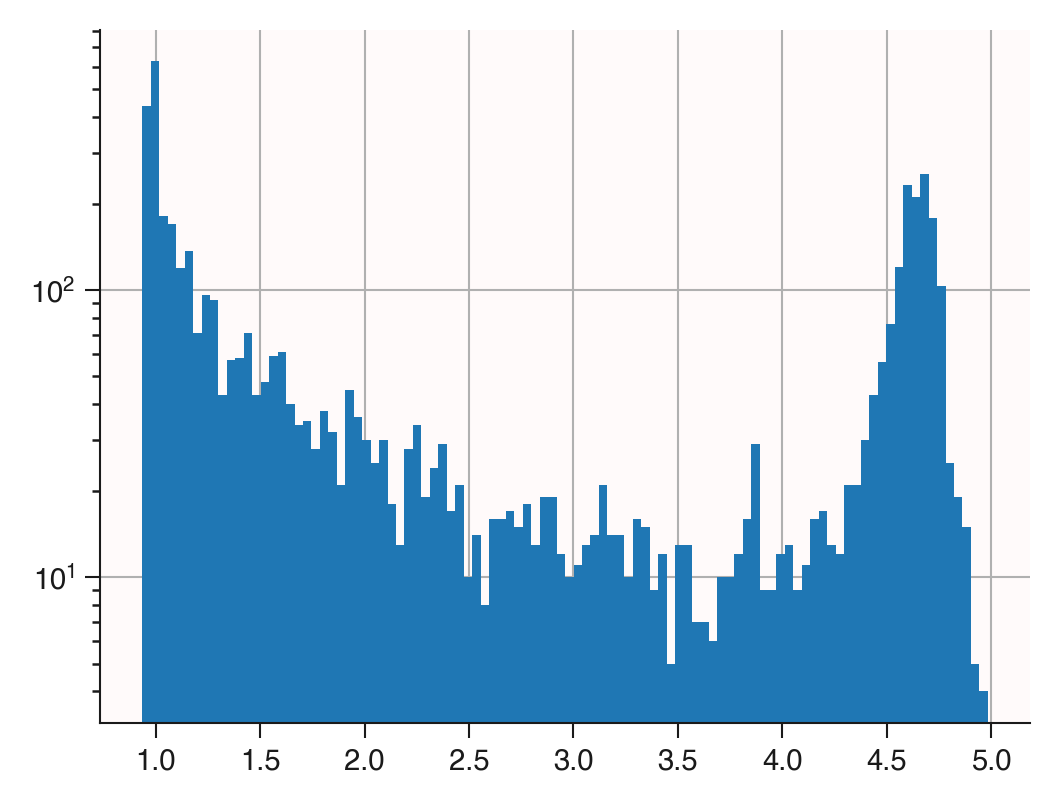

In [42]:
soups['clean_loss_permuted'].hist(bins=100, log=True)

In [43]:
soups['difference'].median(), soups['difference'].mean()

(np.float64(0.004890861129760726), np.float64(0.0472120879366051))

<Axes: >

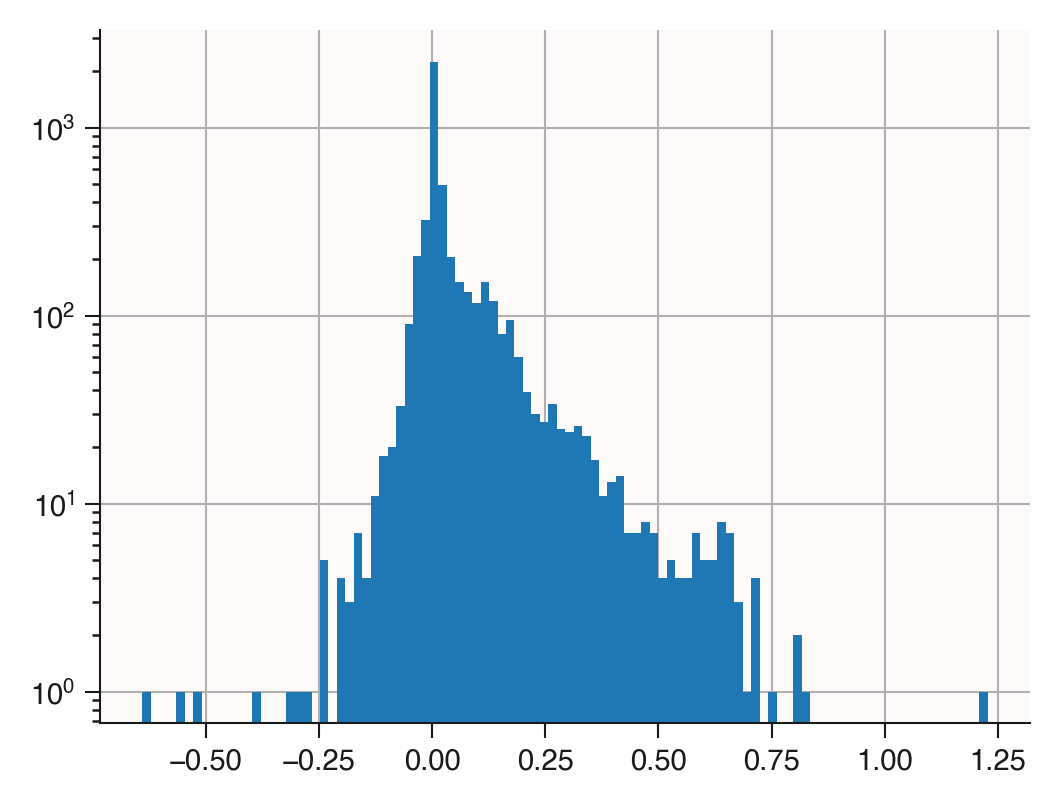

In [44]:
soups['difference'].hist(bins=100, log=True)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(values):
    v = np.asarray(values)
    v = v[~np.isnan(v)]
    v_sorted = np.sort(v)
    y = np.arange(1, len(v_sorted) + 1) / len(v_sorted)
    return v_sorted, y


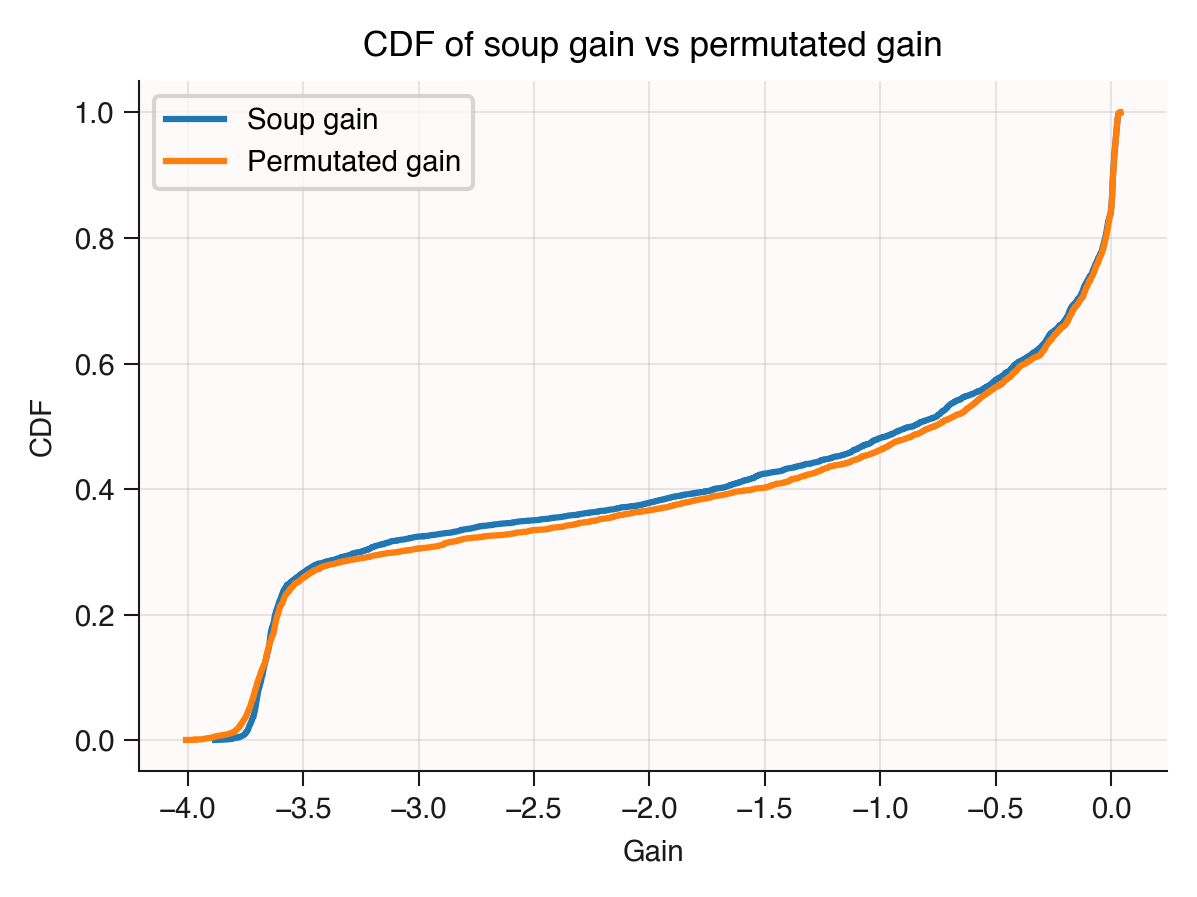

In [46]:
x_soup, y_soup = ecdf(soups['soup_gain'])
x_perm, y_perm = ecdf(soups['permutated_gain'])

fig, ax = plt.subplots()

ax.plot(x_soup, y_soup, label='Soup gain')
ax.plot(x_perm, y_perm, label='Permutated gain')

ax.set_xlabel('Gain')
ax.set_ylabel('CDF')
ax.set_title('CDF of soup gain vs permutated gain')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


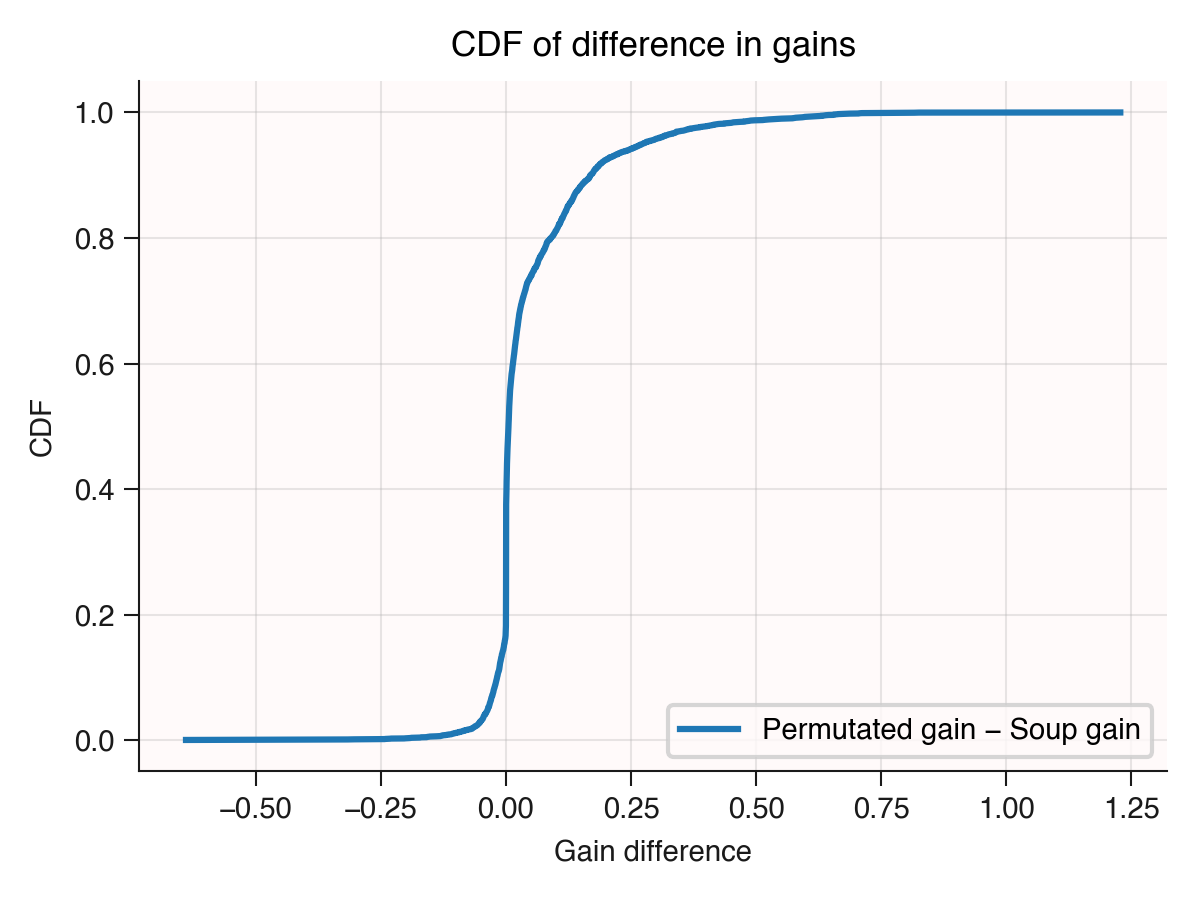

In [47]:
diff = soups['permutated_gain'] - soups['soup_gain']
x_diff, y_diff = ecdf(diff)

fig, ax = plt.subplots()

ax.plot(x_diff, y_diff, label='Permutated gain − Soup gain')

ax.set_xlabel('Gain difference')
ax.set_ylabel('CDF')
ax.set_title('CDF of difference in gains')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig("../report/figures/permutated_vs_soup_gain_cdf.pdf")
plt.show()


# Does it help models that were/weren't already working?

In [48]:
good_soups = soups[soups['soup_gain'] > 0]
bad_soups = soups[soups['soup_gain'] < 0]

(np.float64(-1.6841888428320573e-07), np.float64(0.00015732772709657717))

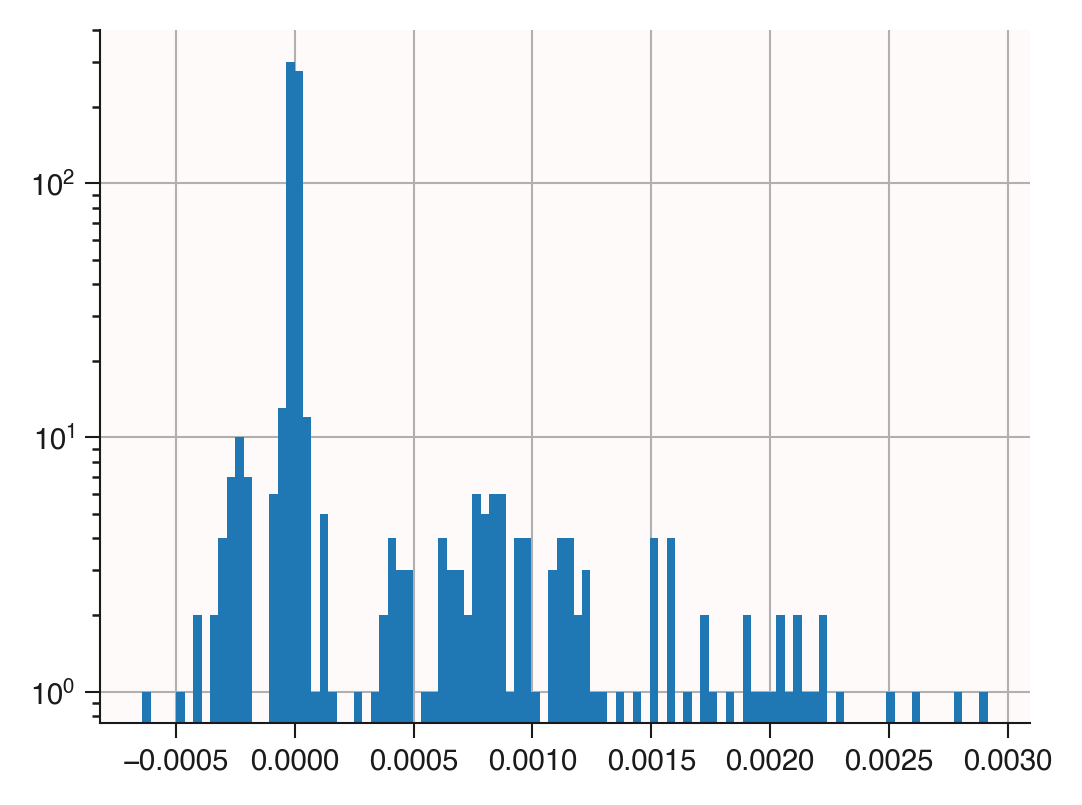

In [49]:
good_soups['difference'].hist(bins=100, log=True)
good_soups['difference'].median(), good_soups['difference'].mean()

(np.float64(0.010036740875244199), np.float64(0.05576240516448197))

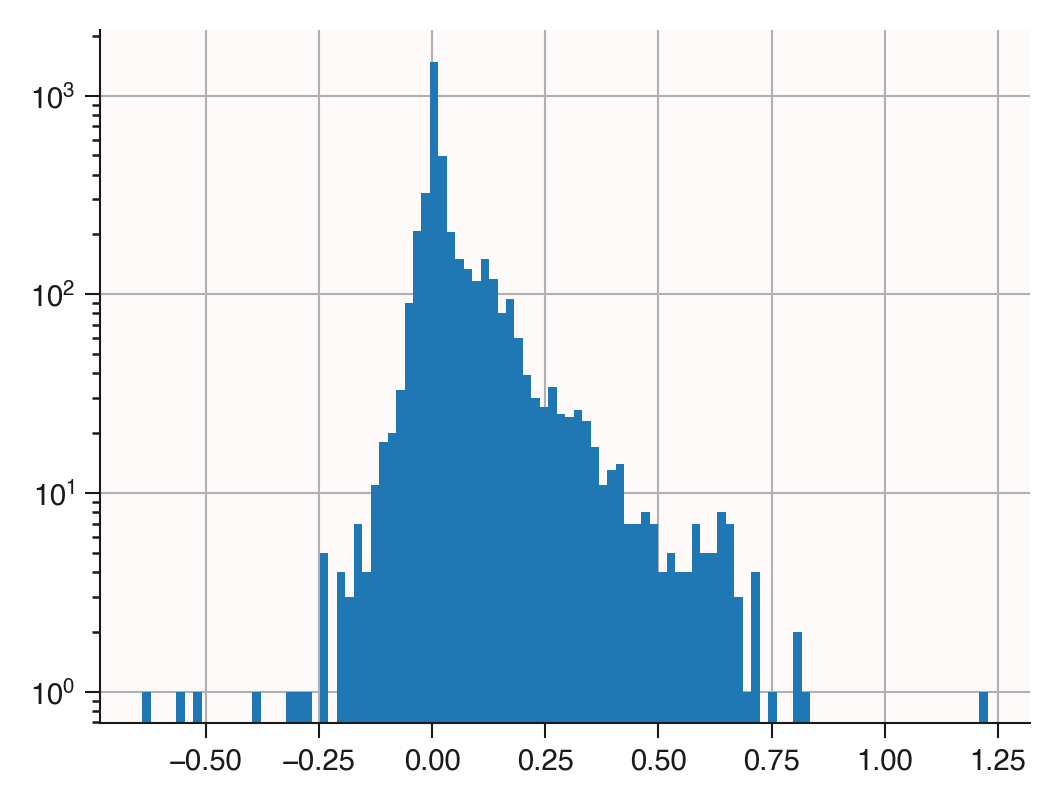

In [50]:
bad_soups['difference'].hist(bins=100, log=True)
bad_soups['difference'].median(), bad_soups['difference'].mean()

## Does souping work more often if we permute?

In [51]:
soups, models = get_models_and_soups_df("../analysis/combined_analysis.parquet")

In [52]:
len(soups[soups['soup_gain'] > 0]) / len(soups)

0.1424570575056012

In [53]:
len(soups[soups['permutated_gain'] > 0]) / len(soups)

0.14320388349514562